In [25]:
"""
이 데이터세트는 제1형 당뇨병(T1DM) 환자 25명으로부터 수집된 
연속 혈당 측정(CGM), 인슐린 투여량, 탄수화물 그램 단위의 식사 섭취량, 걸음 수, 소모 칼로리, 심박수, 그리고 수면의 질과 양에 대한 데이터를 제공합니다.
CGM 데이터는 FreeStyle Libre 2 CGM을 통해 수집되었으며, Fitbit Ionic 스마트워치를 사용하여 최소 14일 동안의 걸음 수, 칼로리, 심박수, 그리고 수면 데이터를 수집했습니다.
이 데이터세트는 혈당 예측 모델, 저혈당 및 고혈당 예측 모델, 그리고 수면, CGM 값, 그리고 언급된 다른 변수들 간의 상관관계 연구에 활용될 수 있습니다.
이 데이터세트는 전처리된 버전에서 바로 사용하거나 원시 데이터를 기반으로 사용자 정의할 수 있습니다.
"""

'\n이 데이터세트는 제1형 당뇨병(T1DM) 환자 25명으로부터 수집된 \n연속 혈당 측정(CGM), 인슐린 투여량, 탄수화물 그램 단위의 식사 섭취량, 걸음 수, 소모 칼로리, 심박수, 그리고 수면의 질과 양에 대한 데이터를 제공합니다.\nCGM 데이터는 FreeStyle Libre 2 CGM을 통해 수집되었으며, Fitbit Ionic 스마트워치를 사용하여 최소 14일 동안의 걸음 수, 칼로리, 심박수, 그리고 수면 데이터를 수집했습니다.\n이 데이터세트는 혈당 예측 모델, 저혈당 및 고혈당 예측 모델, 그리고 수면, CGM 값, 그리고 언급된 다른 변수들 간의 상관관계 연구에 활용될 수 있습니다.\n이 데이터세트는 전처리된 버전에서 바로 사용하거나 원시 데이터를 기반으로 사용자 정의할 수 있습니다.\n'

In [ ]:
import pandas as pd

# 파일 경로
file_path = "./HUPA-UCM_Diabetes_Dataset/Preprocessed/HUPA0001P.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 데이터프레임의 기본 정보 확인
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 1 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   time;glucose;calories;heart_rate;steps;basal_rate;bolus_volume_delivered;carb_input  4096 non-null   object
dtypes: object(1)
memory usage: 32.1+ KB


(None,
   time;glucose;calories;heart_rate;steps;basal_rate;bolus_volume_delivered;carb_input
 0  2018-06-13T18:40:00;332.0;6.359500050544739;82...                                 
 1  2018-06-13T18:45:00;326.0;7.72799998521805;83....                                 
 2  2018-06-13T18:50:00;330.0;4.749500036239624;80...                                 
 3  2018-06-13T18:55:00;324.0;6.359499931335449;89...                                 
 4  2018-06-13T19:00:00;306.0;5.151999890804291;92...                                 )

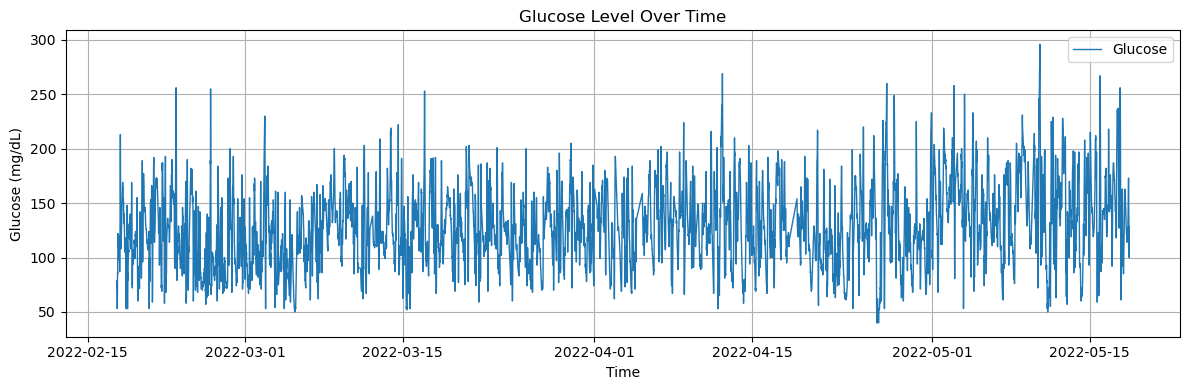

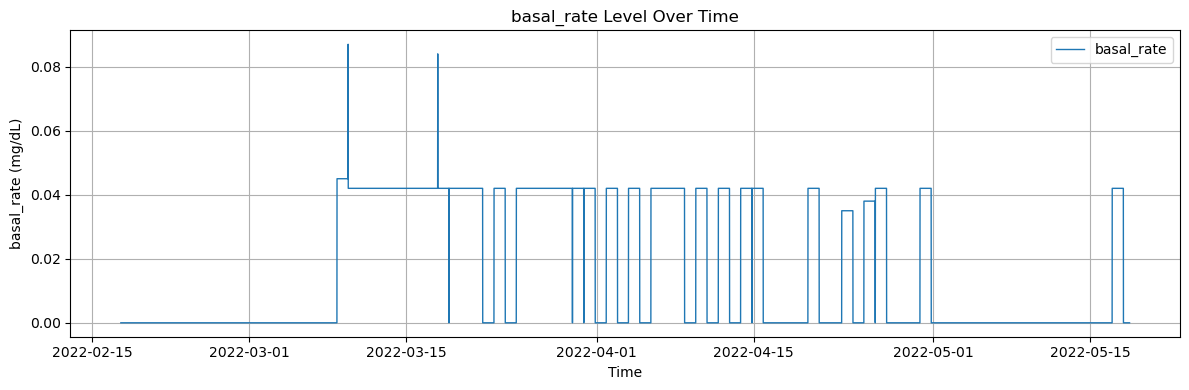

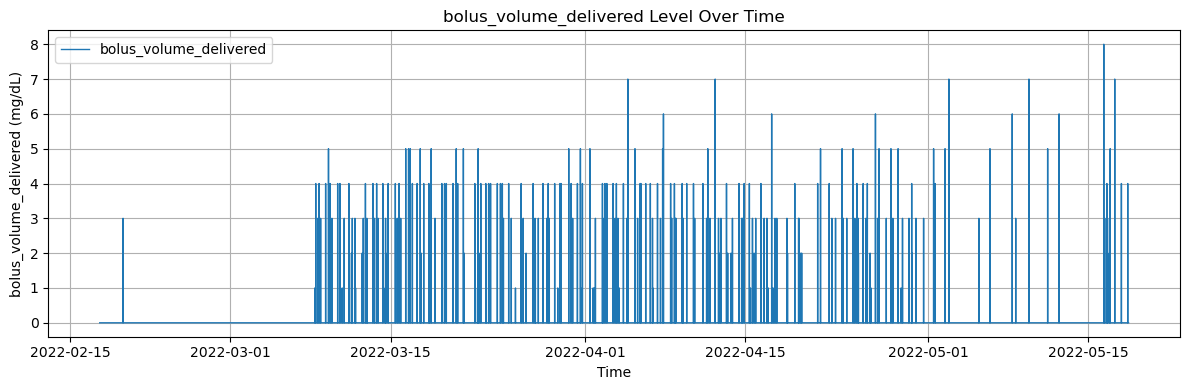

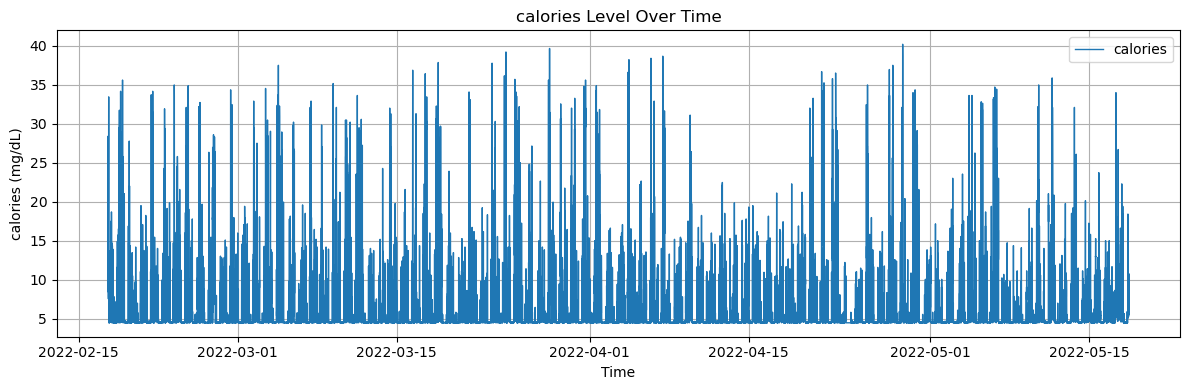

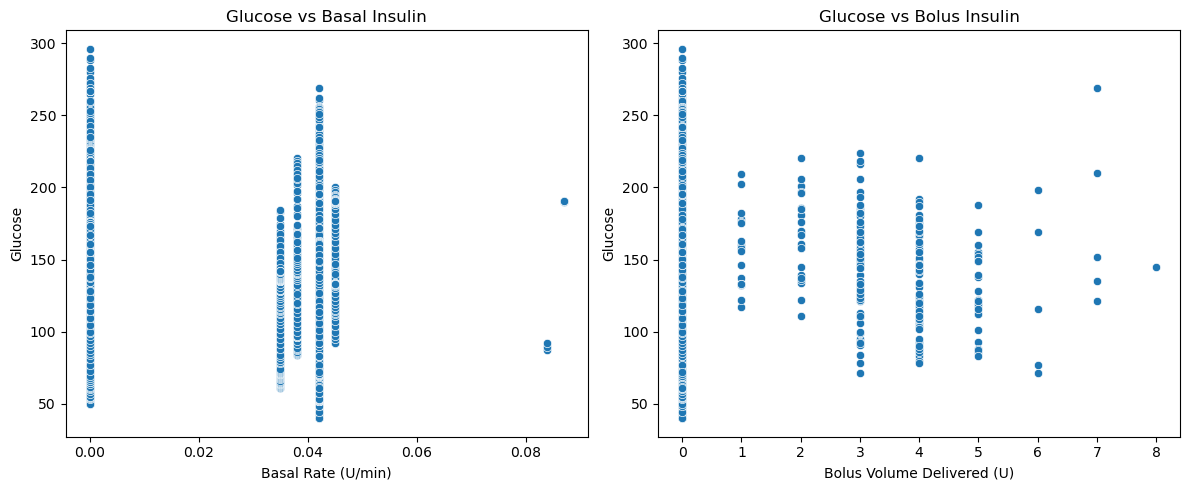

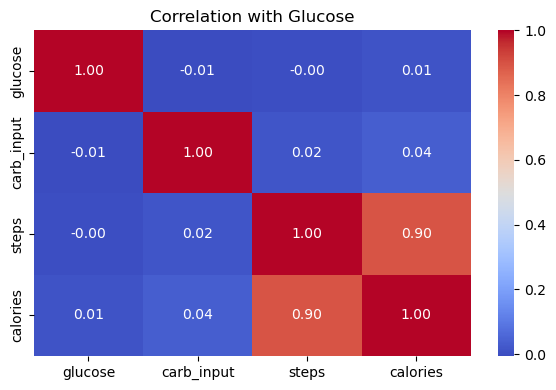

In [23]:
# 문자열을 세미콜론으로 분할하여 각 항목을 컬럼으로 분리
df_split = df.iloc[:, 0].str.split(";", expand=True)

# 컬럼명 지정
df_split.columns = [
    "time", "glucose", "calories", "heart_rate", "steps",
    "basal_rate", "bolus_volume_delivered", "carb_input"
]

# 데이터 타입 변환
df_split["time"] = pd.to_datetime(df_split["time"])
for col in df_split.columns[1:]:
    df_split[col] = pd.to_numeric(df_split[col], errors='coerce')

df_split
import matplotlib.pyplot as plt
import seaborn as sns

# 시간 인덱스 설정
df_split.set_index("time", inplace=True)

# 1. 혈당 변화 추이 시각화
plt.figure(figsize=(12, 4))
plt.plot(df_split.index, df_split["glucose"], label="Glucose", linewidth=1)
plt.title("Glucose Level Over Time")
plt.ylabel("Glucose (mg/dL)")
plt.xlabel("Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 1. basal_rate 변화 추이 시각화
plt.figure(figsize=(12, 4))
plt.plot(df_split.index, df_split["basal_rate"], label="basal_rate", linewidth=1)
plt.title("basal_rate Level Over Time")
plt.ylabel("basal_rate (mg/dL)")
plt.xlabel("Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 1. bolus_volume_delivered 변화 추이 시각화
plt.figure(figsize=(12, 4))
plt.plot(df_split.index, df_split["bolus_volume_delivered"], label="bolus_volume_delivered", linewidth=1)
plt.title("bolus_volume_delivered Level Over Time")
plt.ylabel("bolus_volume_delivered (mg/dL)")
plt.xlabel("Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 1. calories 변화 추이 시각화
plt.figure(figsize=(12, 4))
plt.plot(df_split.index, df_split["calories"], label="calories", linewidth=1)
plt.title("calories Level Over Time")
plt.ylabel("calories (mg/dL)")
plt.xlabel("Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2. 인슐린 주입(기저/볼루스)과 혈당 관계 분석 (산점도)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_split["basal_rate"], y=df_split["glucose"])
plt.title("Glucose vs Basal Insulin")
plt.xlabel("Basal Rate (U/min)")
plt.ylabel("Glucose")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_split["bolus_volume_delivered"], y=df_split["glucose"])
plt.title("Glucose vs Bolus Insulin")
plt.xlabel("Bolus Volume Delivered (U)")
plt.ylabel("Glucose")

plt.tight_layout()
plt.show()

# 3. 식사 및 운동과 혈당 변화 상관관계
correlation_matrix = df_split[["glucose", "carb_input", "steps", "calories"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation with Glucose")
plt.tight_layout()
plt.show()

# 4. 일일 요약 통계
daily_summary = df_split.resample("D").agg({
    "glucose": ["mean", "max"],
    "basal_rate": "sum",
    "bolus_volume_delivered": "sum"
})
daily_summary.columns = ['_'.join(col) for col in daily_summary.columns]


In [14]:
import pandas as pd
import os

# 파일 목록 생성
file_ids = [f"{i:04d}" for i in range(1, 29)]
file_paths = [f"./HUPA-UCM_Diabetes_Dataset/Preprocessed/HUPA{fid}P.csv" for fid in file_ids]

# 데이터 병합용 리스트
all_data = []

for fid, path in zip(file_ids, file_paths):
    try:
        df = pd.read_csv(path)
        df_split = df.iloc[:, 0].str.split(";", expand=True)
        df_split.columns = [
            "time", "glucose", "calories", "heart_rate", "steps",
            "basal_rate", "bolus_volume_delivered", "carb_input"
        ]
        df_split["time"] = pd.to_datetime(df_split["time"])
        for col in df_split.columns[1:]:
            df_split[col] = pd.to_numeric(df_split[col], errors='coerce')
        df_split["patient_id"] = fid  # 환자 ID 추가
        all_data.append(df_split)
    except Exception as e:
        print(f"{path} 처리 중 오류 발생: {e}")

# 전체 통합 데이터프레임 생성
df_all = pd.concat(all_data).set_index("time").sort_index()

# 예시 분석 1: 환자별 일일 평균/최대 혈당 및 인슐린 사용량
summary = df_all.groupby(["patient_id", pd.Grouper(freq='D')]).agg({
    "glucose": ["mean", "max"],
    "basal_rate": "sum",
    "bolus_volume_delivered": "sum"
})
summary.columns = ['_'.join(col) for col in summary.columns]
summary = summary.reset_index()

# 예시 분석 2: 환자별 상관관계 (탄수화물, 걸음수, 칼로리 vs 혈당)
correlation_by_patient = (
    df_all.groupby("patient_id")[["glucose", "carb_input", "steps", "calories"]]
    .corr()
    .loc[pd.IndexSlice[:, "glucose"], :]
    .reset_index()
)


./HUPA-UCM_Diabetes_Dataset/Preprocessed/HUPA0008P.csv 처리 중 오류 발생: [Errno 2] No such file or directory: './HUPA-UCM_Diabetes_Dataset/Preprocessed/HUPA0008P.csv'
./HUPA-UCM_Diabetes_Dataset/Preprocessed/HUPA0012P.csv 처리 중 오류 발생: [Errno 2] No such file or directory: './HUPA-UCM_Diabetes_Dataset/Preprocessed/HUPA0012P.csv'
./HUPA-UCM_Diabetes_Dataset/Preprocessed/HUPA0013P.csv 처리 중 오류 발생: [Errno 2] No such file or directory: './HUPA-UCM_Diabetes_Dataset/Preprocessed/HUPA0013P.csv'


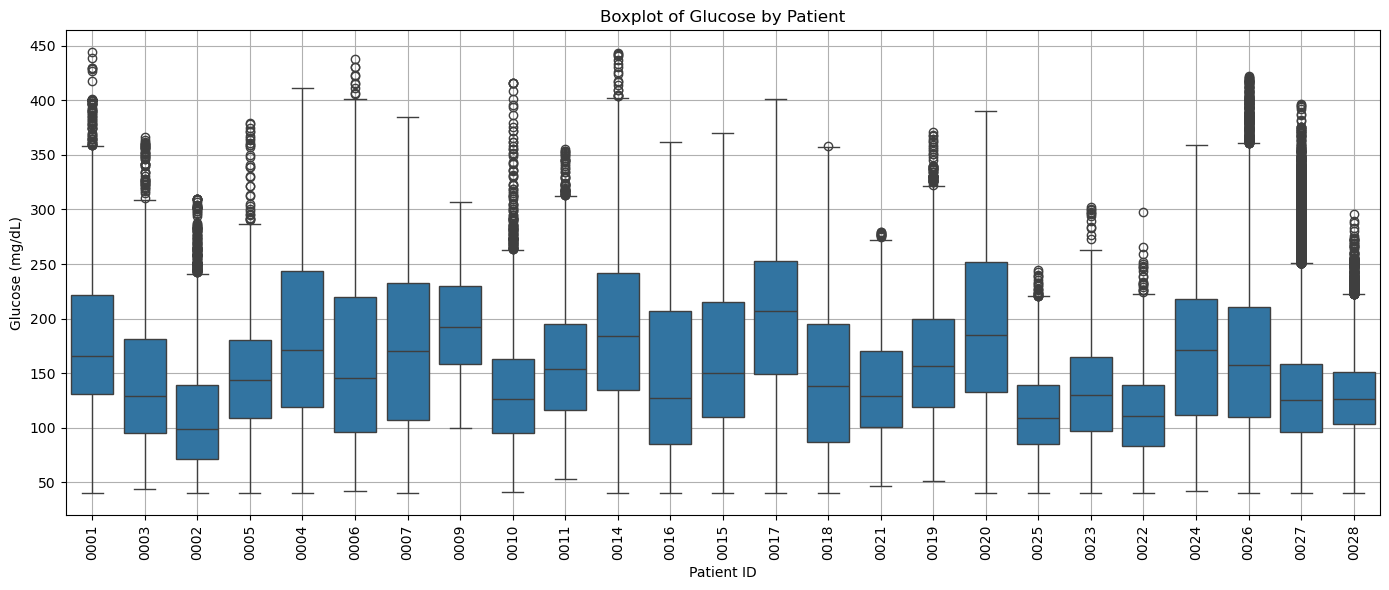

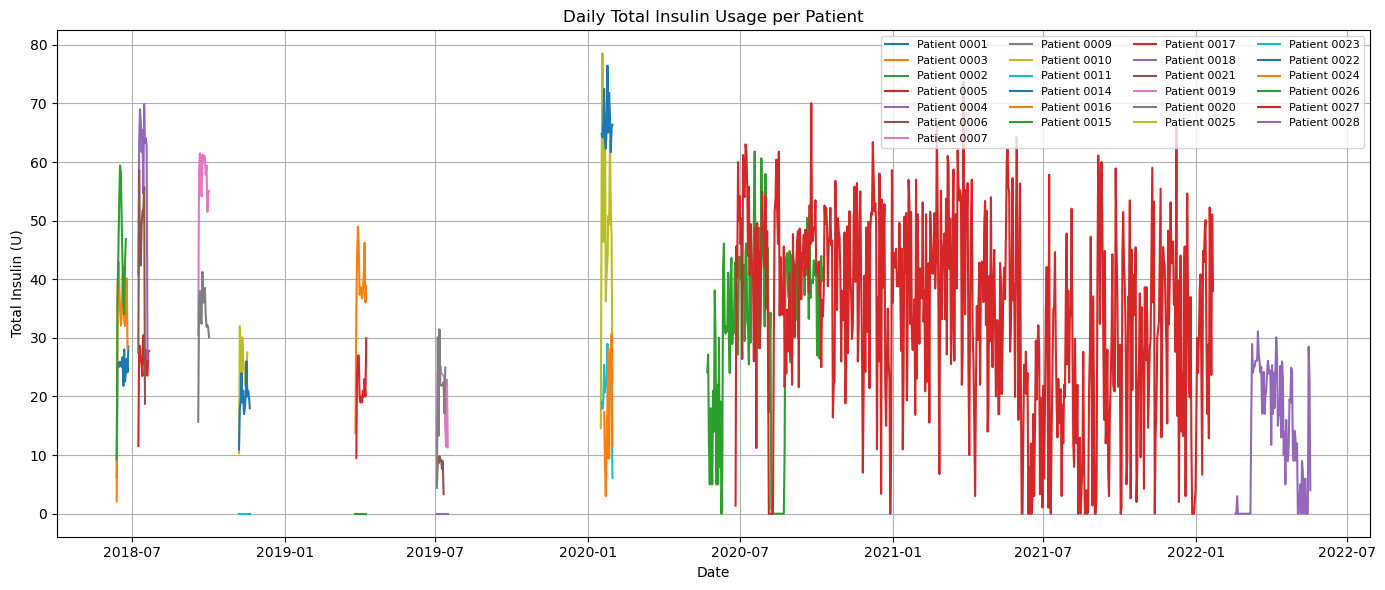

⚠️ 유효한 상관관계 데이터가 없어 히트맵을 그릴 수 없습니다.


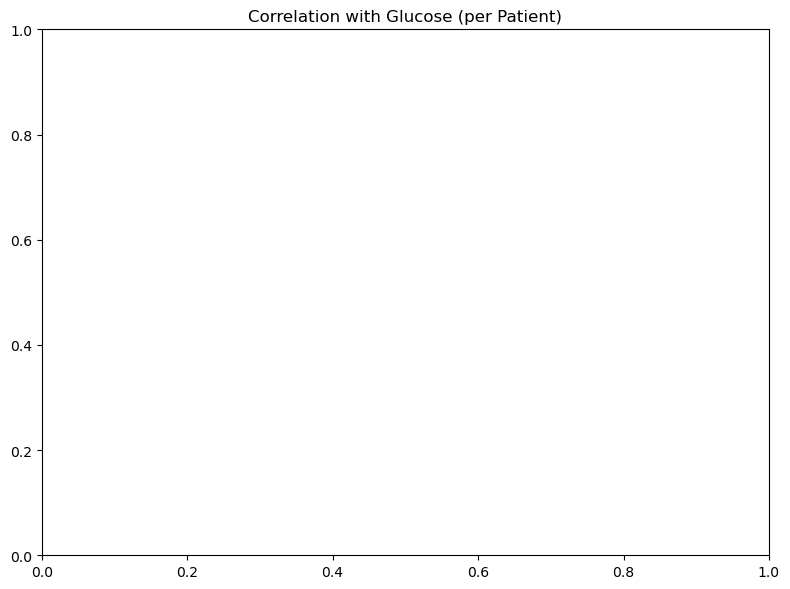

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 환자별 평균 혈당 박스플롯
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_all.reset_index(), x="patient_id", y="glucose")
plt.title("Boxplot of Glucose by Patient")
plt.xlabel("Patient ID")
plt.ylabel("Glucose (mg/dL)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 환자별 일일 총 인슐린(기저+볼루스) 사용량 시계열
df_all["total_insulin"] = df_all["basal_rate"] + df_all["bolus_volume_delivered"]
daily_insulin = df_all.groupby(["patient_id", pd.Grouper(freq='D')])["total_insulin"].sum().reset_index()

plt.figure(figsize=(14, 6))
for pid in df_all["patient_id"].unique():
    sub = daily_insulin[daily_insulin["patient_id"] == pid]
    plt.plot(sub["time"], sub["total_insulin"], label=f"Patient {pid}")

plt.title("Daily Total Insulin Usage per Patient")
plt.xlabel("Date")
plt.ylabel("Total Insulin (U)")
plt.legend(loc="upper right", fontsize=8, ncol=4)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 환자별 상관관계 히트맵 (Glucose vs Carb, Steps, Calories)
# 상관관계 필터링 (glucose 기준)
valid_corr = correlation_by_patient[
    (correlation_by_patient["level_1"].isin(["carb_input", "steps", "calories"])) &
    (correlation_by_patient["glucose"].notnull())
]

# 피벗테이블 생성
if not valid_corr.empty:
    cor_heatmap = valid_corr.pivot(index="patient_id", columns="level_1", values="glucose")
    
    # 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(cor_heatmap.astype(float), annot=True, cmap="coolwarm", center=0)
    plt.title("Correlation with Glucose (per Patient)")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 유효한 상관관계 데이터가 없어 히트맵을 그릴 수 없습니다.")

plt.figure(figsize=(8, 6))
plt.title("Correlation with Glucose (per Patient)")
plt.tight_layout()
plt.show()


In [17]:
print("🔍 기본 정보")
print(df_all.info())

print("\n📌 기술 통계 요약")
display(df_all.describe())

print("\n📉 결측값 비율")
missing_percent = df_all.isnull().mean() * 100
display(missing_percent[missing_percent > 0].sort_values(ascending=False))


🔍 기본 정보
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309392 entries, 2018-06-13 18:40:00 to 2022-05-18 12:15:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   glucose                 309392 non-null  float64
 1   calories                309392 non-null  float64
 2   heart_rate              309392 non-null  float64
 3   steps                   309392 non-null  float64
 4   basal_rate              309392 non-null  float64
 5   bolus_volume_delivered  309392 non-null  float64
 6   carb_input              309392 non-null  float64
 7   patient_id              309392 non-null  object 
 8   total_insulin           309392 non-null  float64
dtypes: float64(8), object(1)
memory usage: 23.6+ MB
None

📌 기술 통계 요약


,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input,total_insulin
count,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000,309392.000000
mean,141.425051,8.813568,76.990001,30.825005,0.041324,0.066058,0.052718,0.107381
std,57.085587,6.930449,15.546699,84.981109,0.036106,0.755075,1.505433,0.756538
min,40.000000,0.000000,32.407773,0.000000,0.000000,-3.000000,0.000000,-2.941000
25%,99.666667,5.846100,64.930233,0.000000,0.000000,0.000000,0.000000,0.000000
50%,132.000000,6.278100,75.418726,0.000000,0.056000,0.000000,0.000000,0.056000
75%,173.000000,9.193060,85.612685,11.000000,0.066000,0.000000,0.000000,0.066000
max,444.000000,106.350000,195.615385,842.000000,0.250000,19.800000,130.000000,19.875000



📉 결측값 비율


Series([], dtype: float64)

/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
/home/gyeom/anaconda3/lib/python3.12/site

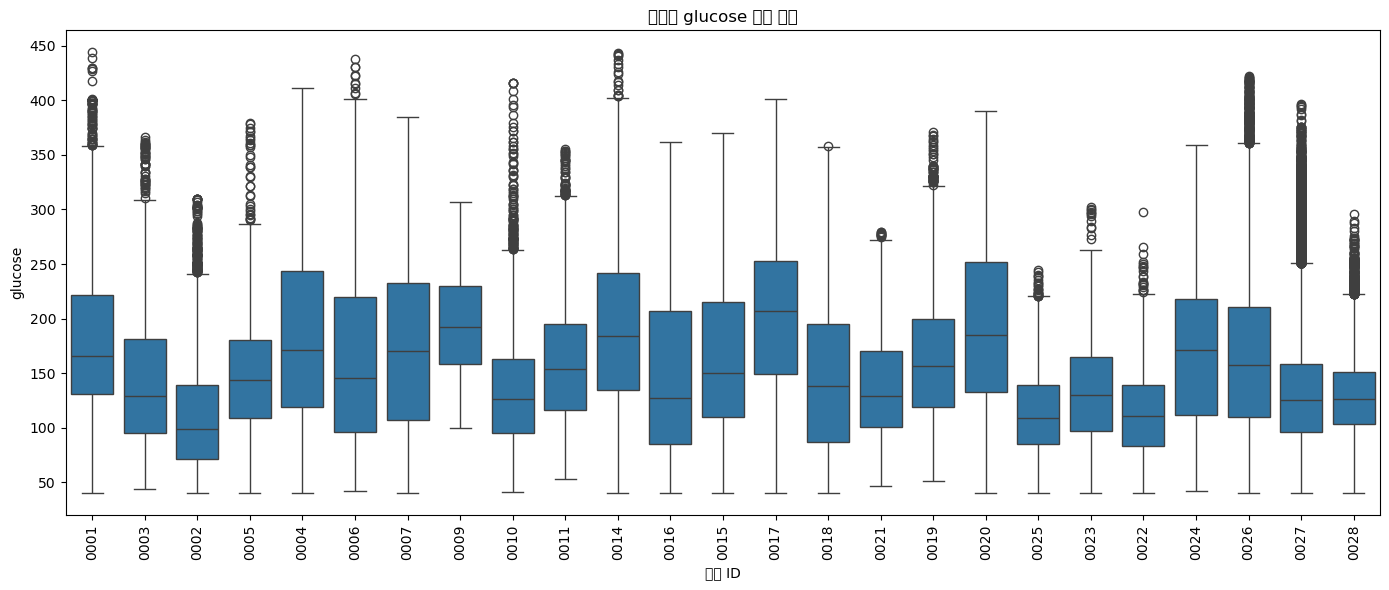

/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
/home/gyeom/anaconda3/lib/python3.12/site

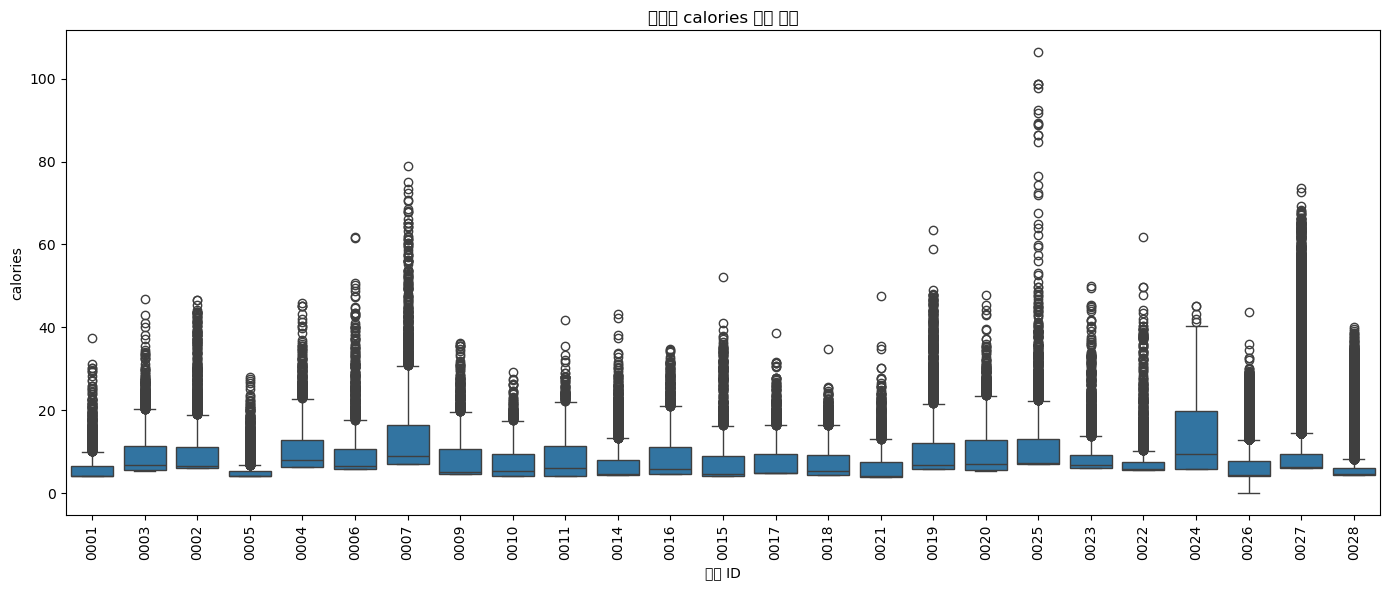

/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
/home/gyeom/anaconda3/lib/python3.12/site

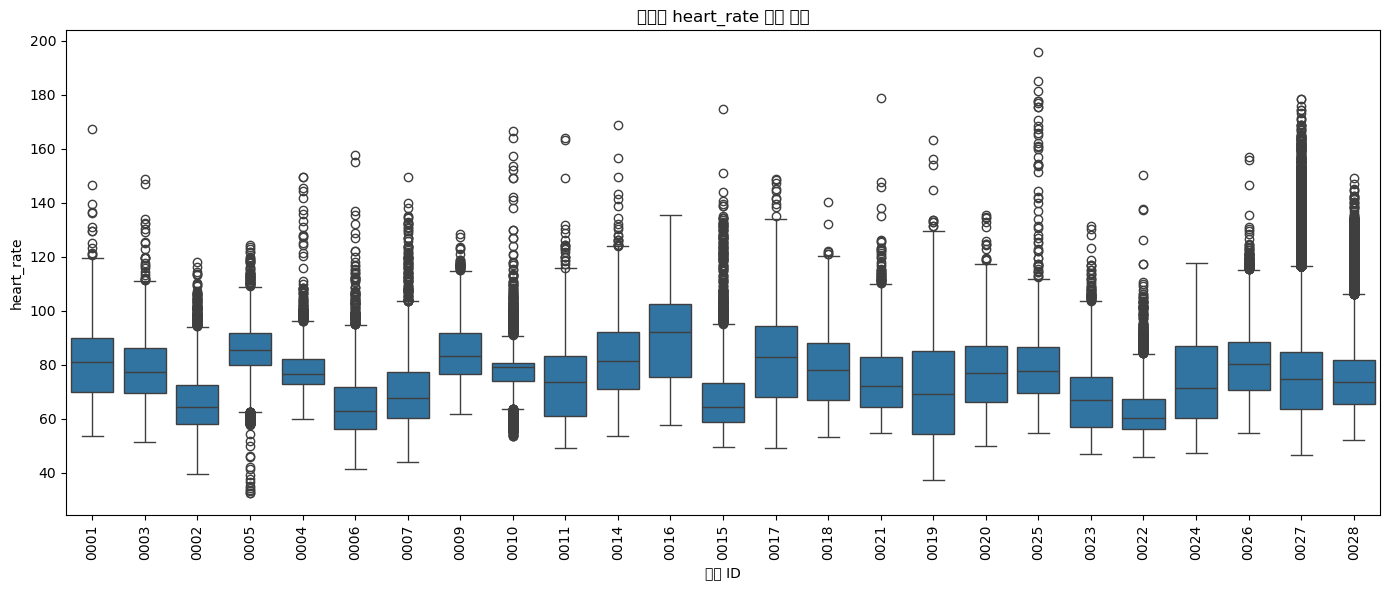

/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
/home/gyeom/anaconda3/lib/python3.12/site

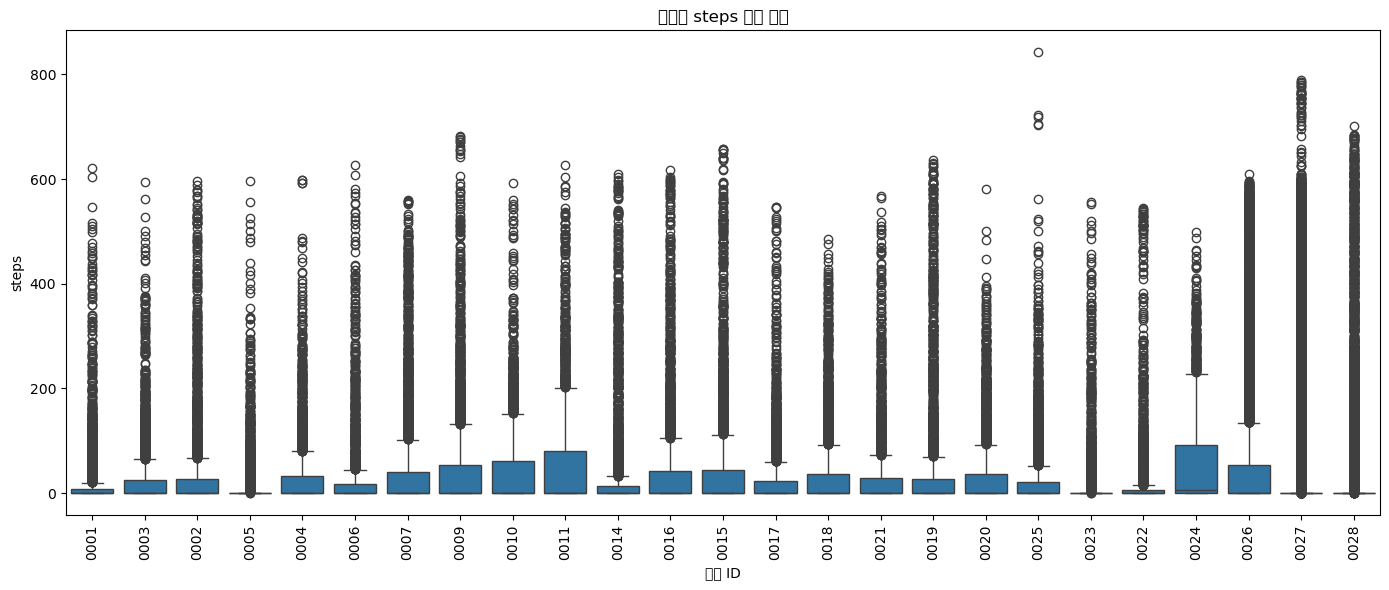

/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
/home/gyeom/anaconda3/lib/python3.12/site

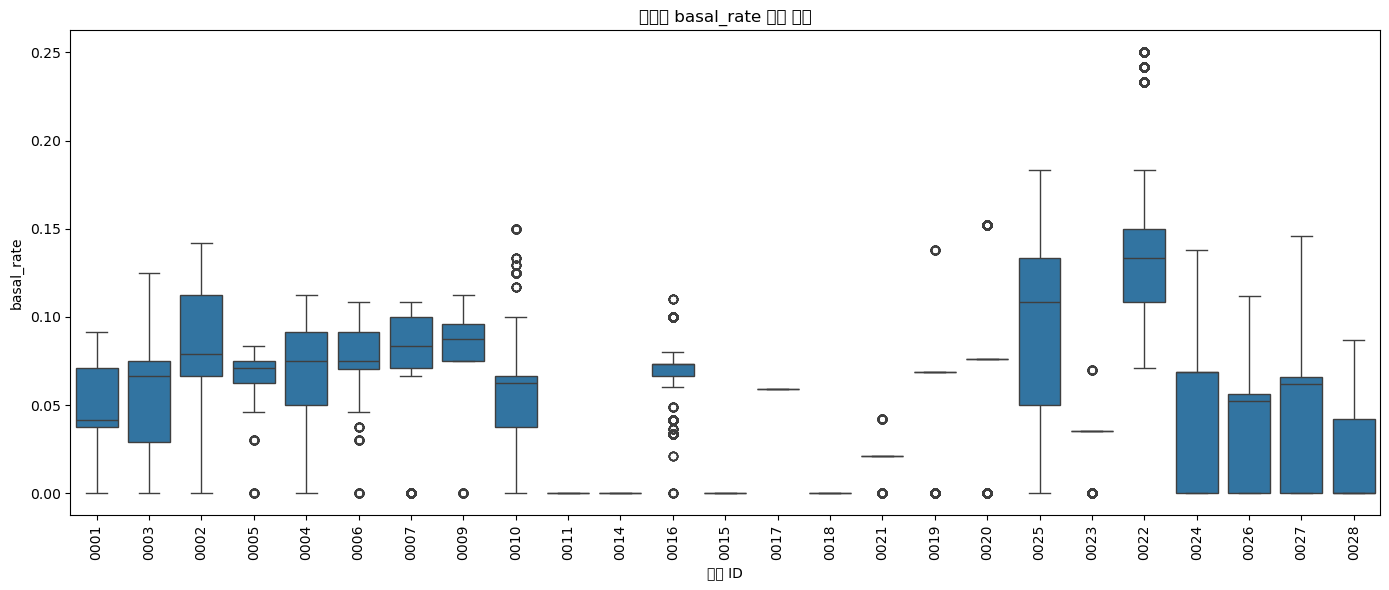

/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
/home/gyeom/anaconda3/lib/python3.12/site

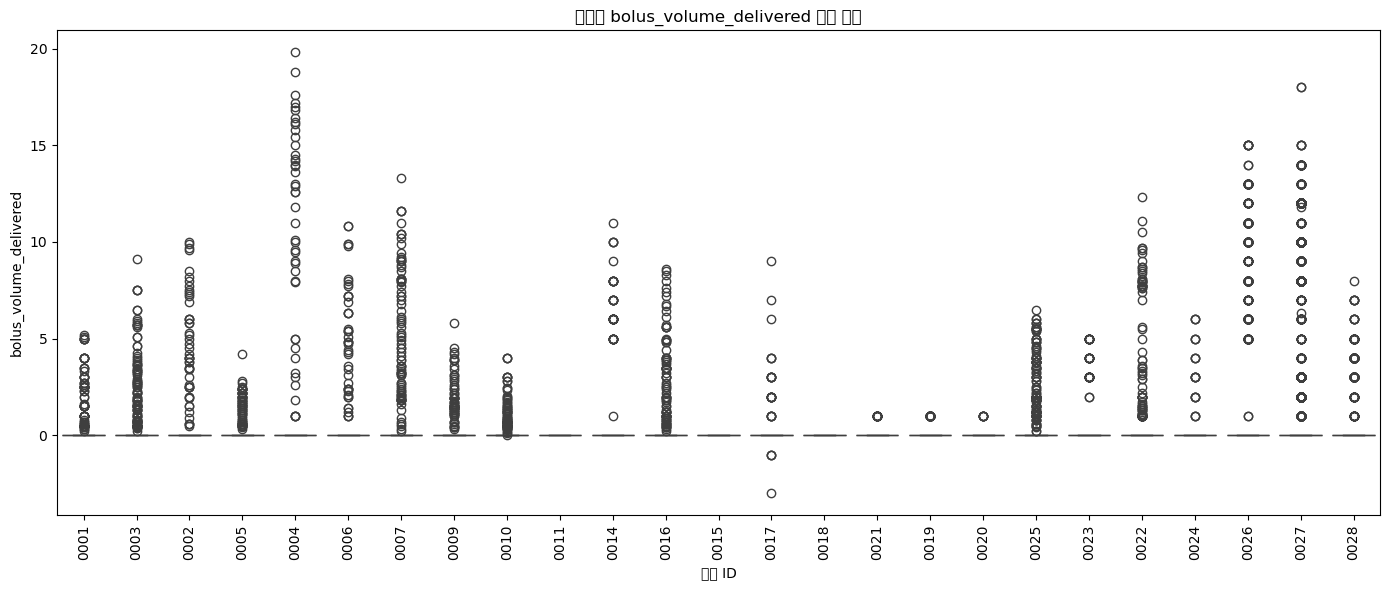

/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/1989435390.py:15: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
/home/gyeom/anaconda3/lib/python3.12/site

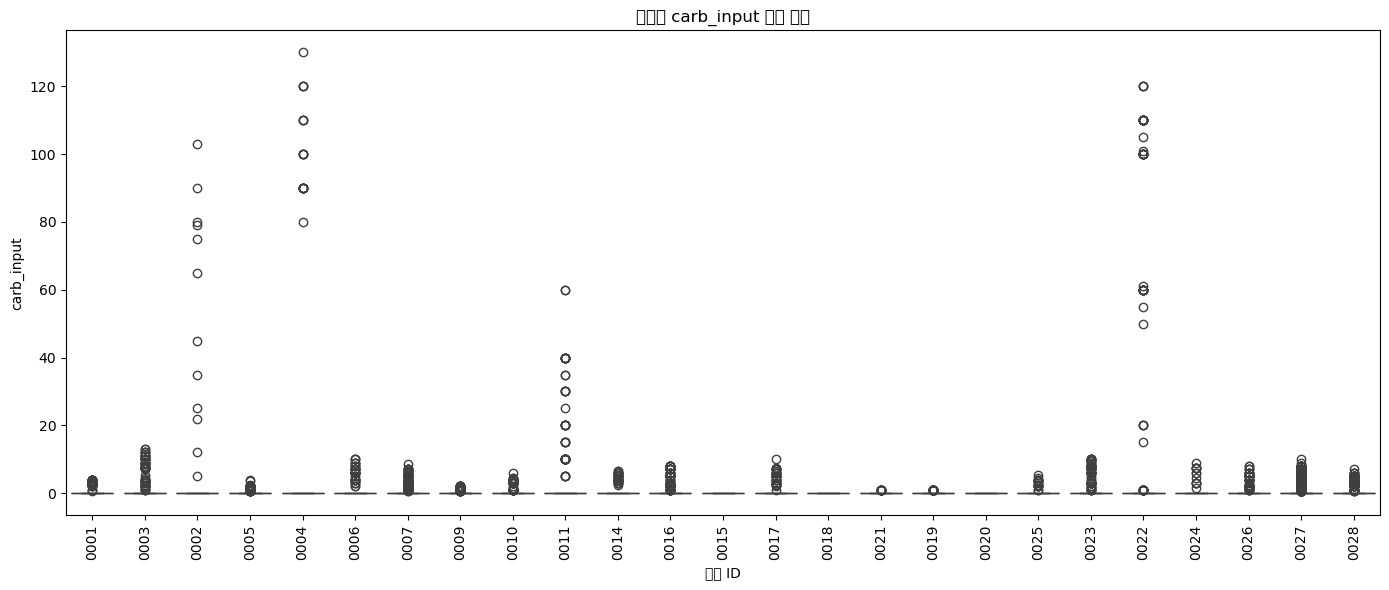

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분포 비교할 변수 목록
features = ["glucose", "calories", "heart_rate", "steps", "basal_rate", "bolus_volume_delivered", "carb_input"]

# 환자 ID 기준 박스플롯 그리기
for feat in features:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df_all.reset_index(), x="patient_id", y=feat)
    plt.title(f"환자별 {feat} 분포 비교")
    plt.xlabel("환자 ID")
    plt.ylabel(feat)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_8212/3192183543.py:7: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/3192183543.py:7: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/3192183543.py:7: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/3192183543.py:7: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/3192183543.py:7: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/3192183543.py:7: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/3192183543.py:7: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8212/3192183543.py:7: UserWar

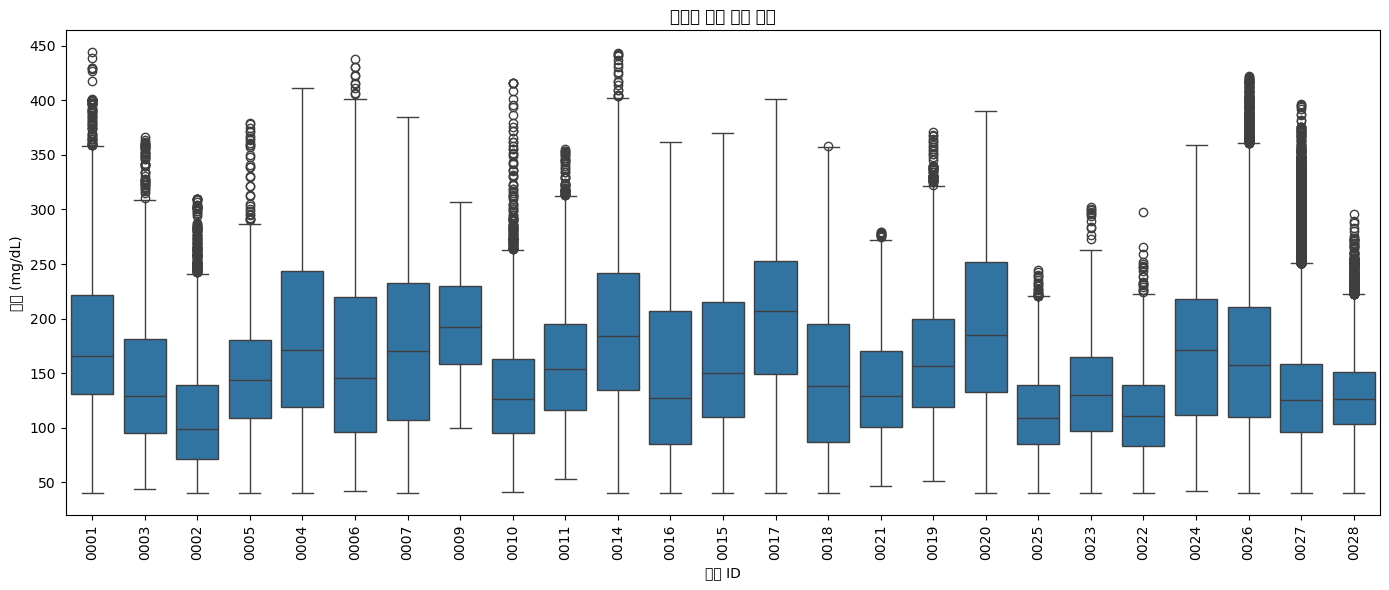

In [19]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_all.reset_index(), x="patient_id", y="glucose")
plt.title("환자별 혈당 분포 비교")
plt.xlabel("환자 ID")
plt.ylabel("혈당 (mg/dL)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/home/gyeom/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gyeom/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gyeom/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gyeom/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gyeom/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figu

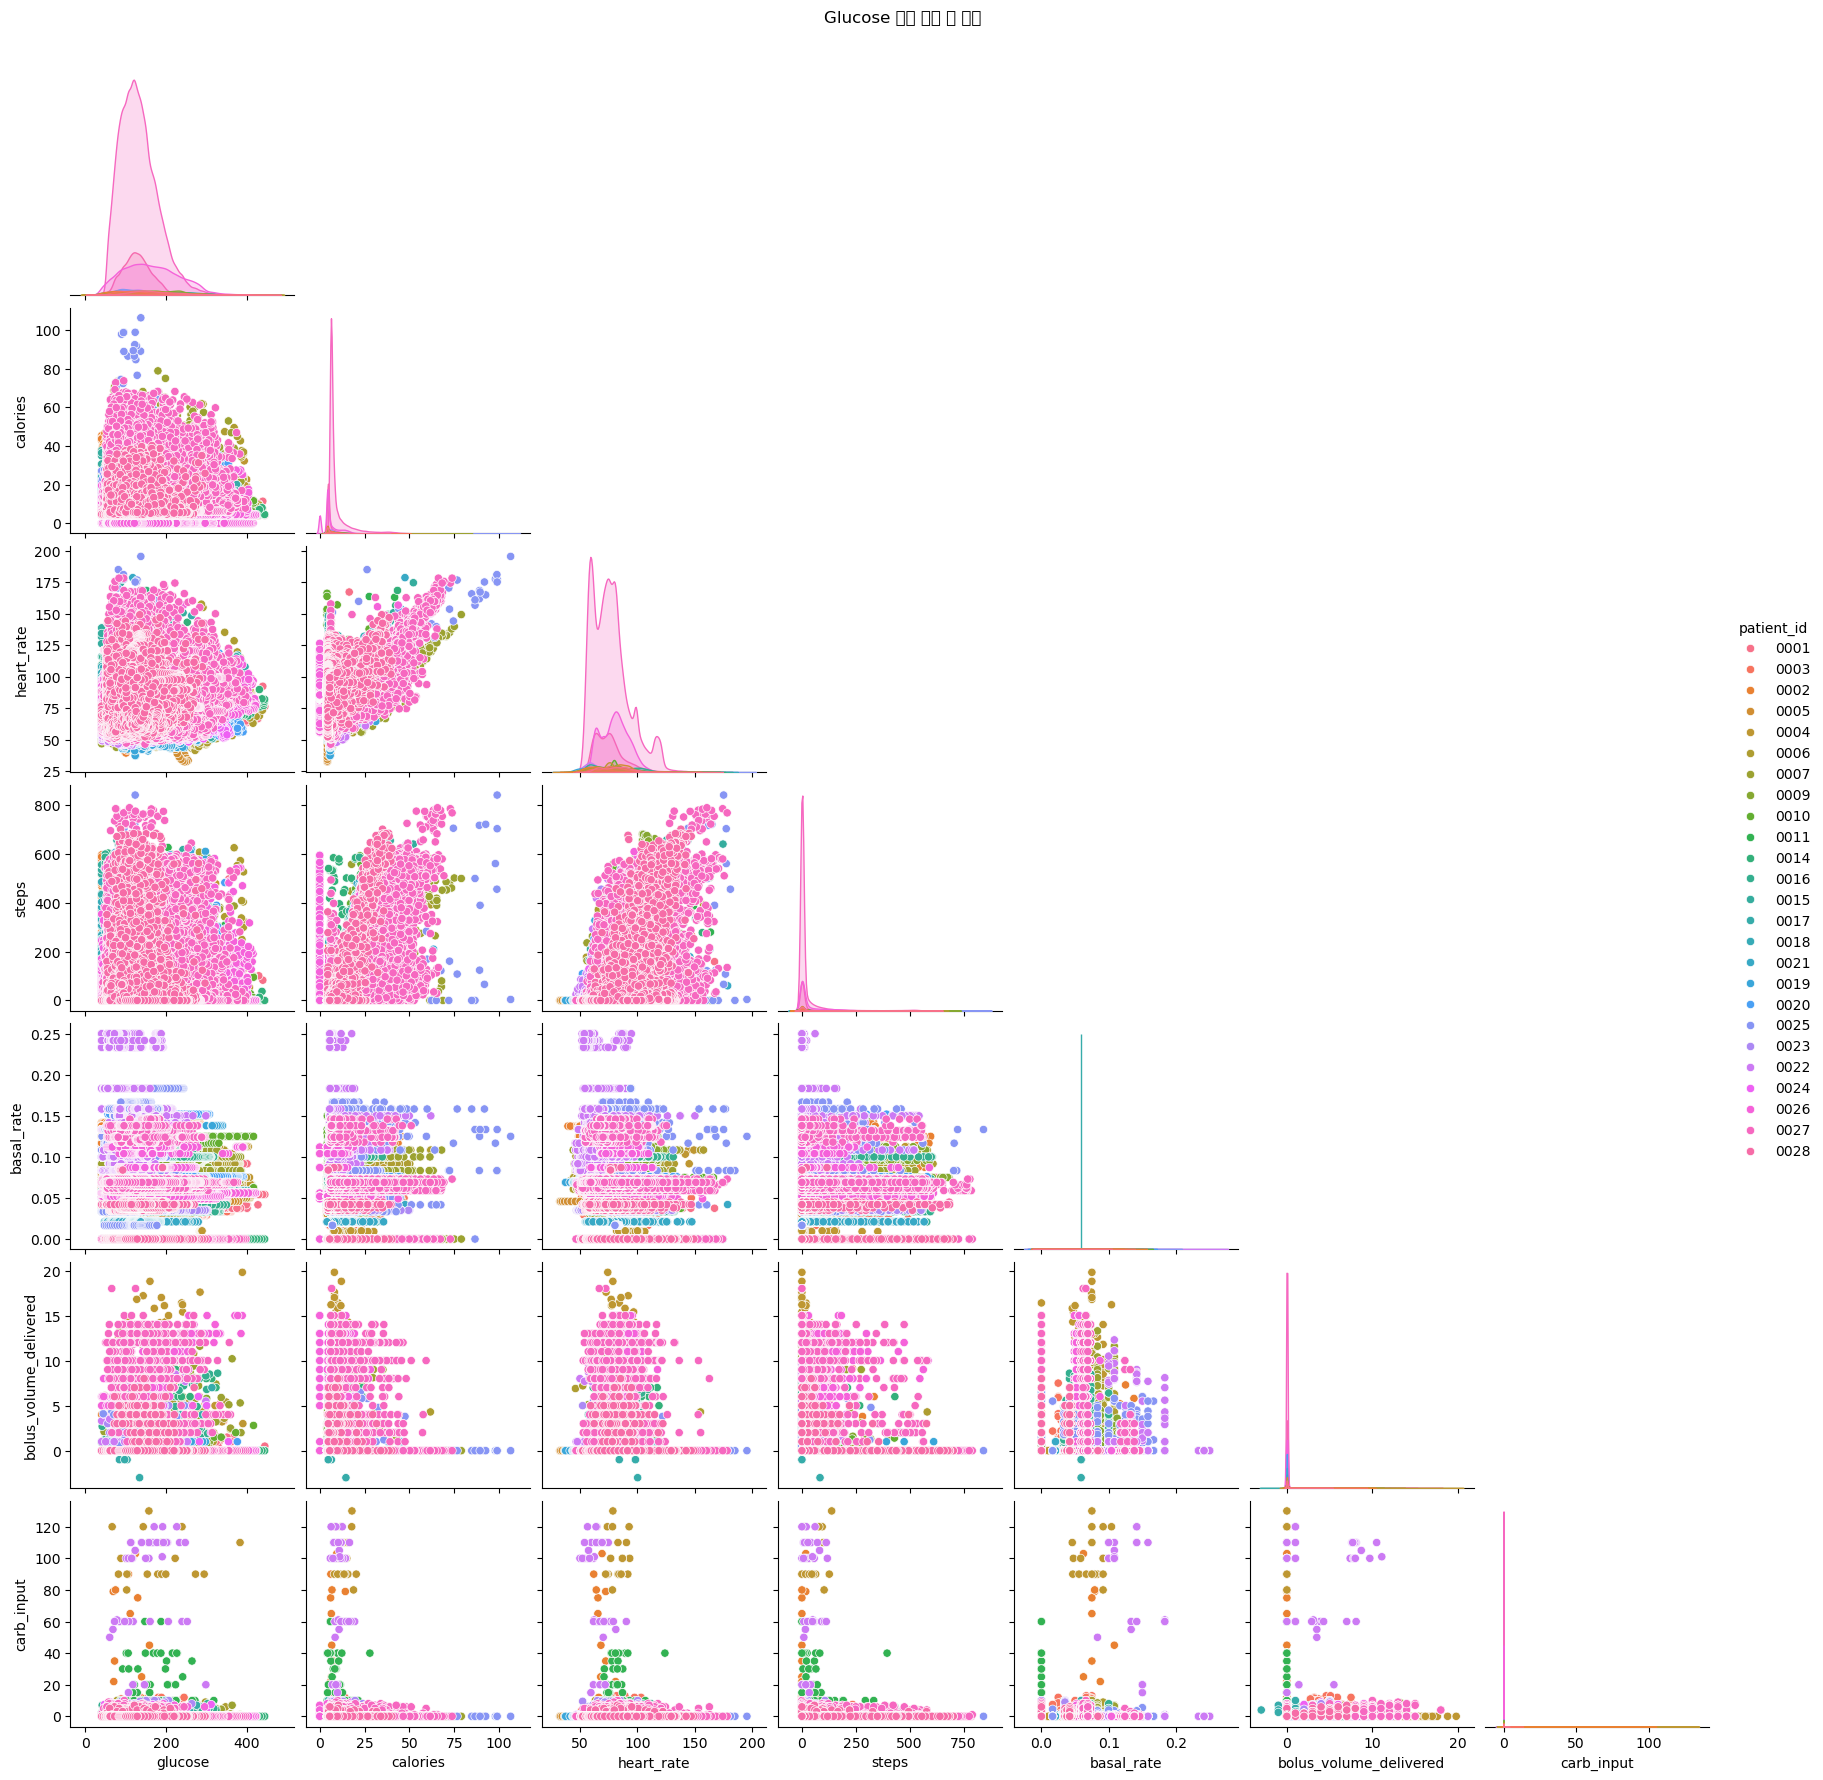

In [21]:
sns.pairplot(df_all.reset_index(), vars=["glucose", "calories", "heart_rate", "steps", "basal_rate", "bolus_volume_delivered", "carb_input"], hue="patient_id", corner=True)
plt.suptitle("Glucose 관련 변수 간 관계", y=1.02)
plt.show()
